In [2]:

import numpy as np
import seaborn as sns
import pandas as pd
import os
from scipy.stats import ranksums
from sklearn import metrics

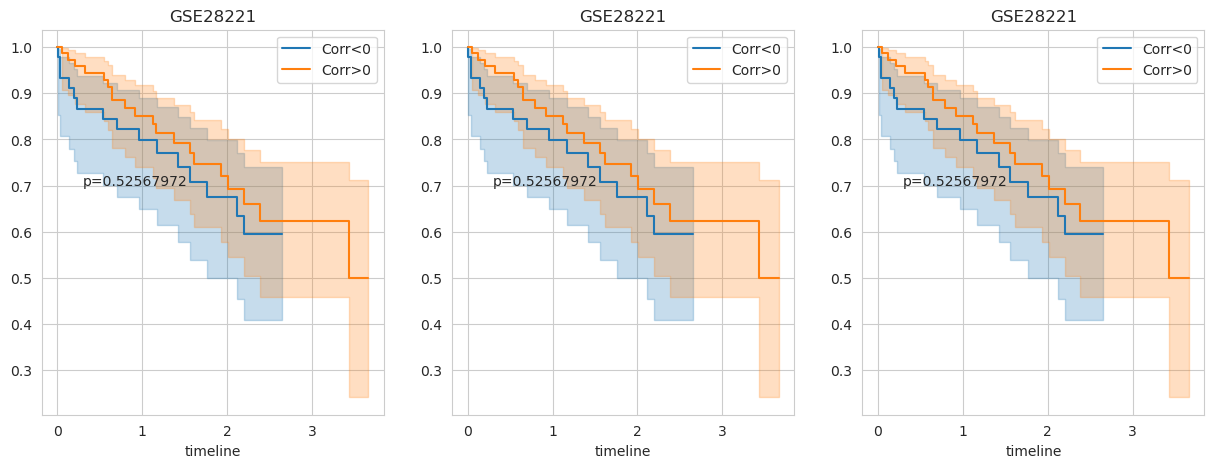

In [192]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

dataset_list = ["GSE28221"]
fig = plt.figure(figsize=(15, 5 * len(dataset_list)))
gs = gridspec.GridSpec(nrows=len(dataset_list), ncols=3, width_ratios=[1, 1, 1])
for i in range(len(dataset_list)):
    dataset = dataset_list[i]
    output_dir = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/4.Macrophage_analysis/{dataset}'
    survival_path = os.path.join(output_dir, f'{dataset}.survival.csv')
    survival_df = pd.read_csv(survival_path).dropna(how='any')
    
    for flag in [1, 2, 3]:
        ax = fig.add_subplot(gs[i, flag-1])
        kmf = KaplanMeierFitter() # KM初始化
        for group_name, group_data in survival_df.groupby(f'corr_group_{flag}'):
            kmf.fit(group_data["time"], group_data["death"], label=group_name)
            kmf.plot_survival_function()
            
        flag = (survival_df[f'corr_group_{flag}'] == 'Corr>0')
        time = survival_df["time"]
        death = survival_df["death"]
        results = logrank_test(time[flag], time[~flag], death[flag], death[~flag], alpha=.99)
        ax.set_title(f"{dataset}")
        ax.text(max(time) / 4, 0.7, f'p={"{:.8f}".format(results.p_value)}', ha='center', fontsize=10)
plt.show()

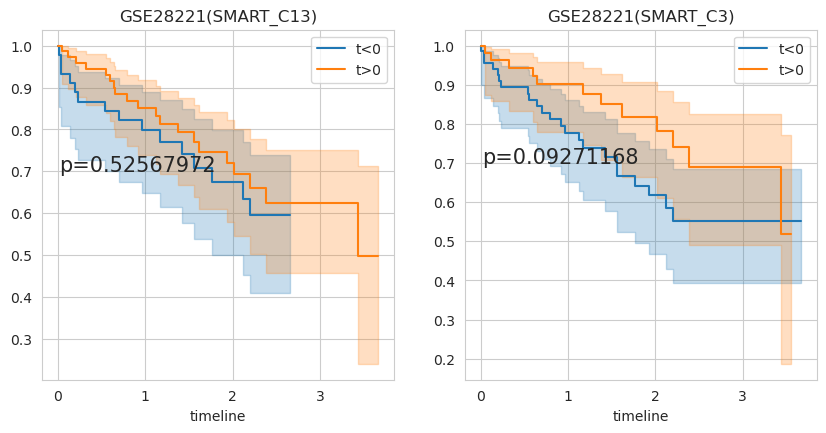

In [193]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# get bulk response survival data
dataset_list = ["GSE28221"]
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1], width_ratios=[1, 1])
for i in range(len(dataset_list)):
    dataset = dataset_list[i]
    output_dir = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/4.Macrophage_analysis/{dataset}'
    survival_path = os.path.join(output_dir, f'{dataset}.survival.csv')
    survival_df = pd.read_csv(survival_path).dropna(how='any')
    
    j = 0
    # for signature_name in ['negative_down100', 'negative_top100', 'positive_down100', 'positive_top100']:
    for signature_name in ['SMART_C13', 'SMART_C3']:
        ax = fig.add_subplot(gs[i, j])
        j += 1
        
        signature_key = signature_name.split('_')[-1] + '_response'
        kmf = KaplanMeierFitter() # KM初始化
        for group_name, group_data in survival_df.groupby(f'{signature_key}_group'):
            kmf.fit(group_data["time"], group_data["death"], label=group_name)
            kmf.plot_survival_function()
                
        flag = (survival_df[f'{signature_key}_group'] == 't>0')
        time = survival_df["time"]
        death = survival_df["death"]
        results = logrank_test(time[flag], time[~flag], death[flag], death[~flag], alpha=.99)
        ax.set_title(f"{dataset}({signature_name})")
        ax.text(max(time) / 4, 0.7, f'p={"{:.8f}".format(results.p_value)}', ha='center', fontsize=15)
plt.show()

In [190]:
# Cox模型求系数和p值
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lifelines import CoxPHFitter

# get bulk response survival data
dataset_list = ["GSE28221"]
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(nrows=len(dataset_list), ncols=1, height_ratios=[1])
for i in range(len(dataset_list)):
    dataset = dataset_list[i]
    output_dir = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/4.Macrophage_analysis/{dataset}'
    
survival_path = os.path.join(output_dir, f'{dataset}.survival.csv')
survival_df = pd.read_csv(survival_path, index_col=0, header=0).dropna(how='any')
survival_df_subset = survival_df[['correlation_2', 'time', 'death', 'C13_response']]
survival_df_subset['multiple'] = survival_df_subset['correlation_2'] * survival_df_subset['C13_response']
    
cph = CoxPHFitter()
cph.fit(survival_df_subset, duration_col='time', event_col='death')
cph.summary
    
#     ax = fig.add_subplot(gs[i, 0])
#     ax.set_title(f"{dataset}")
#     ax.text(max(time) / 4, 0.65, f'p={"{:.8f}".format(results.p_value)}', ha='center', fontsize=15)
# plt.show()

/tmp/ipykernel_5191/3469263635.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_df_subset['multiple'] = survival_df_subset['correlation_2'] * survival_df_subset['C13_response']


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
correlation_2,6.042693,421.025442,12.237186,-17.941750,30.027137,1.614347e-08,1.098044e+13,0.0,0.493798,0.621449,0.686292
C13_response,-0.049747,0.951470,0.245913,-0.531728,0.432233,5.875889e-01,1.540694e+00,0.0,-0.202297,0.839685,0.252080
multiple,2.040684,7.695869,2.349908,-2.565051,6.646419,7.691524e-02,7.700217e+02,0.0,0.868410,0.385170,1.376433


<Figure size 1000x1000 with 0 Axes>

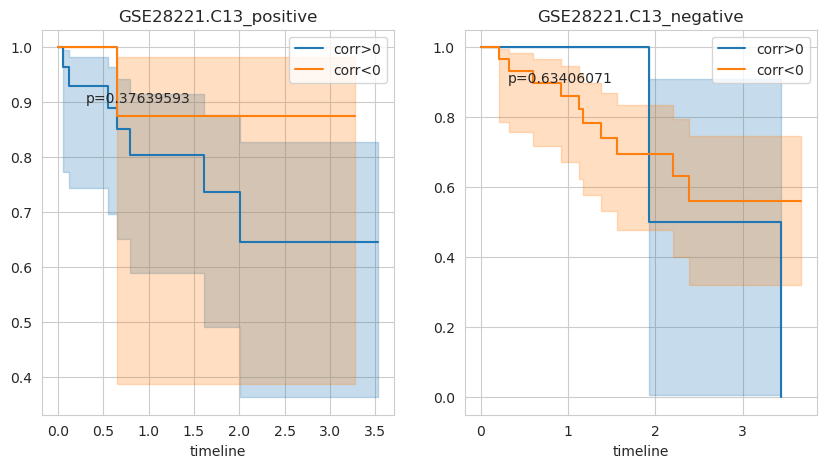

In [191]:
# 对C13分组绘制Corr的分组KM图
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lifelines import CoxPHFitter

# get bulk response survival data
dataset_list = ["GSE28221"]
fig = plt.figure(figsize=(10, len(dataset_list) * 5))
gs = gridspec.GridSpec(nrows=len(dataset_list), ncols=2, width_ratios=[1, 1])
for i in range(len(dataset_list)):
    dataset = dataset_list[i]
    output_dir = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/4.Macrophage_analysis/{dataset}'
    
    survival_path = os.path.join(output_dir, f'{dataset}.survival.csv')
    survival_df = pd.read_csv(survival_path, index_col=0, header=0).dropna(how='any')
    C13_positive = survival_df[survival_df['C13_response'] > 0]
    C13_negative = survival_df[survival_df['C13_response'] < 0]
    
    j = 0
    for plot_name in ['C13_positive', 'C13_negative']:
        ax = fig.add_subplot(gs[i, j])
        j += 1
        
        if plot_name == 'C13_positive':
            survival_df = C13_positive
        else:
            survival_df = C13_negative
            
        kmf = KaplanMeierFitter() # KM初始化
        high_flag = (survival_df[f'correlation_2'] > 0)
        corr_high = survival_df[high_flag]
        kmf.fit(corr_high["time"], corr_high["death"], label='corr>0')
        kmf.plot_survival_function()
        corr_low = survival_df[~high_flag]
        kmf.fit(corr_low["time"], corr_low["death"], label='corr<0')
        kmf.plot_survival_function()

        time = survival_df["time"]
        death = survival_df["death"]
        results = logrank_test(time[high_flag], time[~high_flag], death[high_flag], death[~high_flag], alpha=.99)
        ax.set_title(f"{dataset}.{plot_name}")
        ax.text(max(time) / 4, 0.9, f'p={"{:.8f}".format(results.p_value)}', ha='center', fontsize=10)
plt.show()

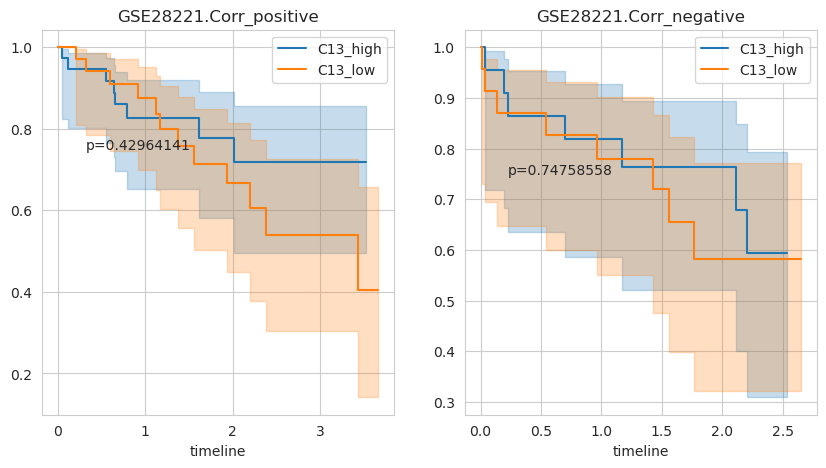

In [186]:
# 对C13分组绘制Corr的分组KM图
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lifelines import CoxPHFitter

# get bulk response survival data
dataset_list = ["GSE28221"]
fig = plt.figure(figsize=(10, len(dataset_list) * 5))
gs = gridspec.GridSpec(nrows=len(dataset_list), ncols=2, width_ratios=[1, 1])
for i in range(len(dataset_list)):
    dataset = dataset_list[i]
    output_dir = f'/sibcb2/bioinformatics2/hongyuyang/dataset/Tres/4.Macrophage_analysis/{dataset}'
    
    survival_path = os.path.join(output_dir, f'{dataset}.survival.csv')
    survival_df = pd.read_csv(survival_path, index_col=0, header=0).dropna(how='any')
    Corr_positive = survival_df[survival_df['corr_group_2'] == 'Corr>0']
    Corr_negative = survival_df[survival_df['corr_group_2'] == 'Corr<0']
    
    j = 0
    for plot_name in ['Corr_positive', 'Corr_negative']:
        ax = fig.add_subplot(gs[i, j])
        j += 1
        
        if plot_name == 'Corr_positive':
            survival_df = Corr_positive
        else:
            survival_df = Corr_negative
            
        kmf = KaplanMeierFitter() # KM初始化
        
        high_flag = survival_df['C13_response'] > np.median(survival_df['C13_response'])
        C13_high = survival_df[high_flag]
        kmf.fit(C13_high["time"], C13_high["death"], label='C13_high')
        kmf.plot_survival_function()
        C13_low = survival_df[~high_flag]
        kmf.fit(C13_low["time"], C13_low["death"], label='C13_low')
        kmf.plot_survival_function()
            
        time = survival_df["time"]
        death = survival_df["death"]
        results = logrank_test(time[high_flag], time[~high_flag], death[high_flag], death[~high_flag], alpha=.99)
        ax.set_title(f"{dataset}.{plot_name}")
        ax.text(max(time) / 4, 0.75, f'p={"{:.8f}".format(results.p_value)}', ha='center', fontsize=10)
plt.show()

In [187]:
survival_df

,time,death,C13_response,C13_response_group,C3_response,C3_response_group,correlation_1,corr_group_1,correlation_2,corr_group_2,correlation_3,corr_group_3
sample_name,,,,,,,,,,,,
P82,1.174538,0.0,-4.098484,t<0,-0.464621,t<0,-0.155197,Corr<0,-0.159736,Corr<0,-0.119338,Corr<0
P100,1.158111,0.0,-4.457383,t<0,-0.217505,t<0,-0.156711,Corr<0,-0.161659,Corr<0,-0.126808,Corr<0
P101,1.141684,0.0,-4.223411,t<0,-0.077343,t<0,-0.151656,Corr<0,-0.155022,Corr<0,-0.110966,Corr<0
P102,1.103354,0.0,-3.696034,t<0,-0.388742,t<0,-0.146851,Corr<0,-0.147026,Corr<0,-0.103462,Corr<0
P104,1.103354,0.0,-4.771770,t<0,-0.305722,t<0,-0.161674,Corr<0,-0.168394,Corr<0,-0.130376,Corr<0
P105,1.065024,0.0,-4.482339,t<0,0.031607,t>0,-0.157113,Corr<0,-0.161875,Corr<0,-0.120619,Corr<0
P107,1.007529,0.0,-4.138494,t<0,-0.243632,t<0,-0.142761,Corr<0,-0.141434,Corr<0,-0.100249,Corr<0
P108,0.596737,0.0,-4.485658,t<0,-0.535056,t<0,-0.153052,Corr<0,-0.156641,Corr<0,-0.127485,Corr<0
P34,2.650126,0.0,-4.758171,t<0,-0.487209,t<0,-0.158780,Corr<0,-0.165580,Corr<0,-0.142339,Corr<0
